- Libraries

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
plt.style.use('classic')

In [21]:
print(f"TensorFlow version = {tf.__version__}\n")

TensorFlow version = 2.11.0



- Path and Read

In [12]:
path_file1 = r'Data/Slicer/slicer.csv'
path_file2 = r'Data\UP - Down\updown.csv'


df = pd.read_csv(path_file1)
df2 = pd.read_csv(path_file2)
index = range(1, len(df['Accel x (m/s^2)']) + 1)
df.head(2)

,Accel x (m/s^2),Accel y (m/s^2),Accel z (m/s^2),w_x (rad/s),w_y (rad/s),w_z (rad/s),Temp (°C)
0,0.68,-2.09,8.36,0.38,0.15,0.38,25.63
1,0.76,-3.11,9.09,-0.01,0.11,-0.36,25.64


In [48]:
data_s = df.shape
data_s2 = df2.shape

if data_s > data_s2:
    df = df.iloc[:data_s2[0]]
else:
    df2 = df2.iloc[:data_s[0]]

df.to_csv(r'Data/slicer.csv', index=False)
df.to_csv(r'Data/updow.csv', index=False)

C:\Users\danie\AppData\Local\Temp\ipykernel_14120\3497124507.py:3: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "g." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['Accel x (m/s^2)'], 'g.', label='x', linestyle='solid', marker=',')
C:\Users\danie\AppData\Local\Temp\ipykernel_14120\3497124507.py:4: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['Accel y (m/s^2)'], 'b.', label='y', linestyle='solid', marker=',')
C:\Users\danie\AppData\Local\Temp\ipykernel_14120\3497124507.py:5: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['Accel z (m/s^2)'], 'r.', label='z', linestyle='solid', marker=',')


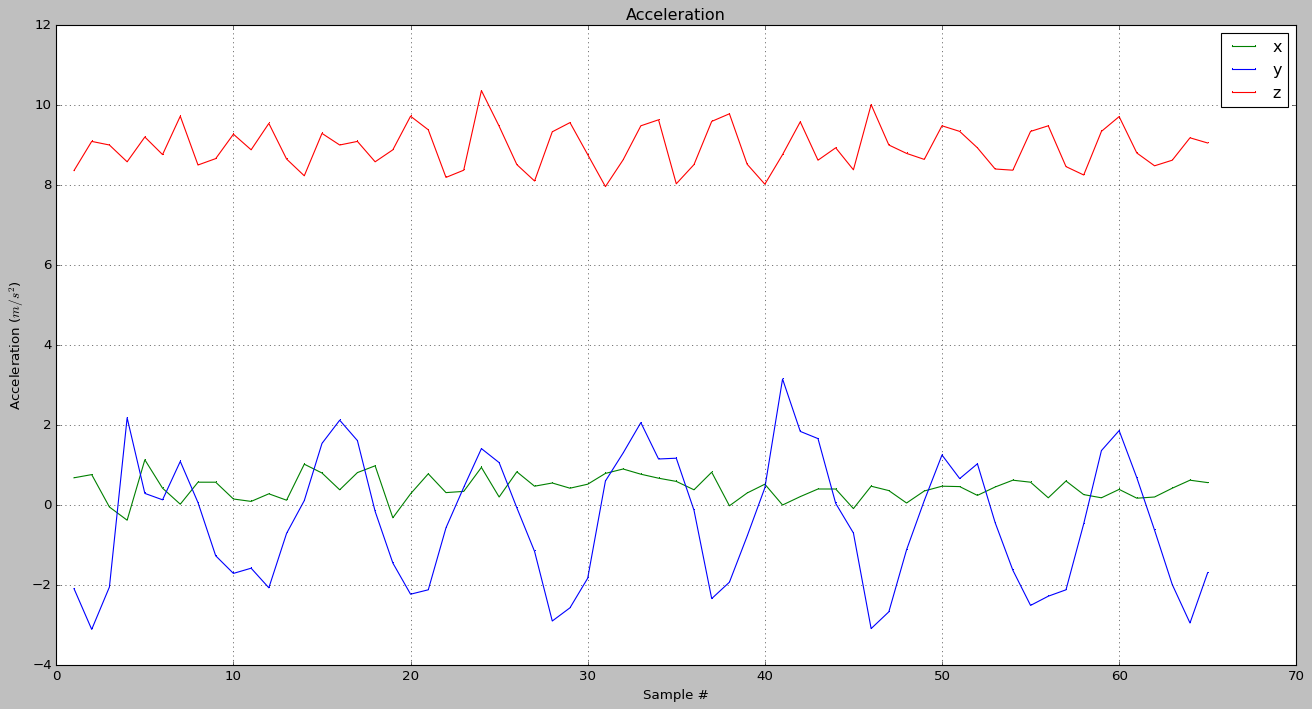

In [44]:
plt.rcParams["figure.figsize"] = (20,10)

plt.plot(index, df['Accel x (m/s^2)'], 'g.', label='x', linestyle='solid', marker=',')
plt.plot(index, df['Accel y (m/s^2)'], 'b.', label='y', linestyle='solid', marker=',')
plt.plot(index, df['Accel z (m/s^2)'], 'r.', label='z', linestyle='solid', marker=',')
plt.title("Acceleration")
plt.xlabel("Sample #")
plt.ylabel("Acceleration ($m/s^2$)")
plt.legend()
plt.grid()
plt.show()

C:\Users\danie\AppData\Local\Temp\ipykernel_14120\1019486377.py:1: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "g." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['w_x (rad/s)'], 'g.', label='x', linestyle='solid', marker=',')
C:\Users\danie\AppData\Local\Temp\ipykernel_14120\1019486377.py:2: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['w_y (rad/s)'], 'b.', label='y', linestyle='solid', marker=',')
C:\Users\danie\AppData\Local\Temp\ipykernel_14120\1019486377.py:3: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['w_z (rad/s)'], 'r.', label='z', linestyle='solid', marker=',')


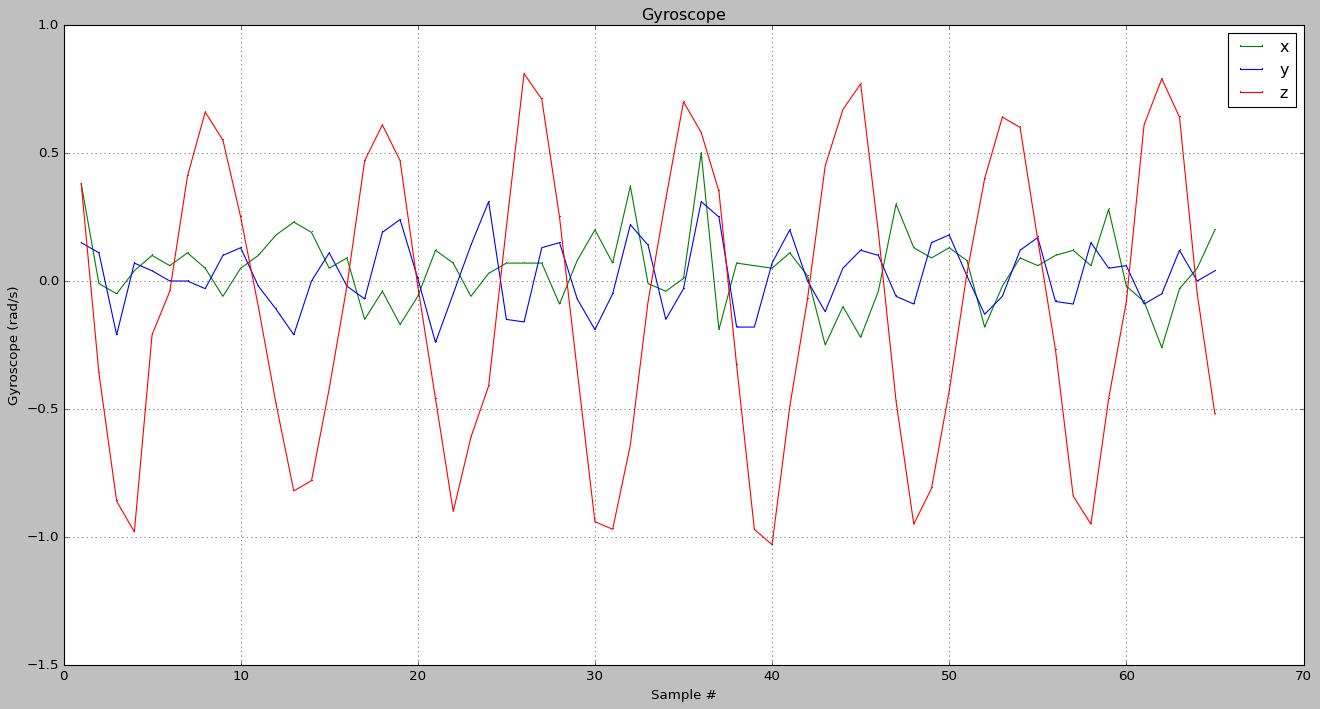

In [45]:
plt.plot(index, df['w_x (rad/s)'], 'g.', label='x', linestyle='solid', marker=',')
plt.plot(index, df['w_y (rad/s)'], 'b.', label='y', linestyle='solid', marker=',')
plt.plot(index, df['w_z (rad/s)'], 'r.', label='z', linestyle='solid', marker=',')
plt.title("Gyroscope")
plt.xlabel("Sample #")
plt.ylabel("Gyroscope (rad/s)")
plt.legend()
plt.grid()
plt.show()

In [51]:
GESTURES = [
    "slicer",
    "updown",
]

SAMPLES_PER_GESTURE = min(df.shape[0], df2.shape[0])
NUM_GESTURES = len(GESTURES)
ONE_HOT_ENCODED_GESTURES = np.eye(NUM_GESTURES)
inputs = []
outputs = []
for gesture_index in range(NUM_GESTURES):
  gesture = GESTURES[gesture_index]
  print(f"Processing index {gesture_index} for gesture '{gesture}'.")
  
  output = ONE_HOT_ENCODED_GESTURES[gesture_index]
  
  df = pd.read_csv("Data/" + gesture + ".csv")
  
  # calculate the number of gesture recordings in the file
  num_recordings = int(df.shape[0] / SAMPLES_PER_GESTURE)
  
  print(f"\tThere are {num_recordings} recordings of the {gesture} gesture.")
  
  for i in range(num_recordings):
    tensor = []
    for j in range(SAMPLES_PER_GESTURE):
      index = i * SAMPLES_PER_GESTURE + j
      # normalize the input data, between 0 to 1:
      # - acceleration is between: -4 to +11 you could change it
      # - gyroscope is between: -1 to +1
      tensor += [
          (df['Accel x (m/s^2)'][index] + 7.5) / 15,
          (df['Accel y (m/s^2)'][index] + 7.5) / 15,
          (df['Accel z (m/s^2)'][index] + 7.5) / 15,
          (df['w_x (rad/s)'][index] + 1) / 2,
          (df['w_y (rad/s)'][index] + 1) / 2,
          (df['w_z (rad/s)'][index] + 1) / 2
      ]

    inputs.append(tensor)
    outputs.append(output)

inputs = np.array(inputs)
outputs = np.array(outputs)

print("Data set parsing and preparation complete.")


Processing index 0 for gesture 'slicer'.
	There are 1 recordings of the slicer gesture.
Processing index 1 for gesture 'updown'.
	There are 1 recordings of the updown gesture.
Data set parsing and preparation complete.


In [52]:
num_inputs = len(inputs)
randomize = np.arange(num_inputs)
np.random.shuffle(randomize)

inputs = inputs[randomize]
outputs = outputs[randomize]

TRAIN_SPLIT = int(0.6 * num_inputs)
TEST_SPLIT = int(0.2 * num_inputs + TRAIN_SPLIT)

inputs_train, inputs_test, inputs_validate = np.split(inputs, [TRAIN_SPLIT, TEST_SPLIT])
outputs_train, outputs_test, outputs_validate = np.split(outputs, [TRAIN_SPLIT, TEST_SPLIT])

print("Data set randomization and splitting complete.")

Data set randomization and splitting complete.


In [63]:
# build the model and train it
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(50, activation='relu')) # relu is used for performance
model.add(tf.keras.layers.Dense(15, activation='relu'))
model.add(tf.keras.layers.Dense(NUM_GESTURES, activation='softmax')) # softmax is used, because we only expect one gesture to occur per input
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
history = model.fit(inputs_train, outputs_train, epochs=600, batch_size=1, validation_data=(inputs_validate, outputs_validate))

Epoch 1/600
1/1 [==============================] - 1s 930ms/step - loss: 0.0697 - mae: 0.2639 - val_loss: 0.9827 - val_mae: 0.9913
Epoch 2/600
1/1 [==============================] - 0s 36ms/step - loss: 7.5457e-05 - mae: 0.0087 - val_loss: 0.9829 - val_mae: 0.9914
Epoch 3/600
1/1 [==============================] - 0s 35ms/step - loss: 7.4154e-05 - mae: 0.0086 - val_loss: 0.9830 - val_mae: 0.9915
Epoch 4/600
1/1 [==============================] - 0s 31ms/step - loss: 7.2840e-05 - mae: 0.0085 - val_loss: 0.9832 - val_mae: 0.9915
Epoch 5/600
1/1 [==============================] - 0s 31ms/step - loss: 7.1513e-05 - mae: 0.0085 - val_loss: 0.9833 - val_mae: 0.9916
Epoch 6/600
1/1 [==============================] - 0s 34ms/step - loss: 7.0174e-05 - mae: 0.0084 - val_loss: 0.9835 - val_mae: 0.9917
Epoch 7/600
1/1 [==============================] - 0s 33ms/step - loss: 6.8826e-05 - mae: 0.0083 - val_loss: 0.9836 - val_mae: 0.9918
Epoch 8/600
1/1 [==============================] - 0s 48ms/step -

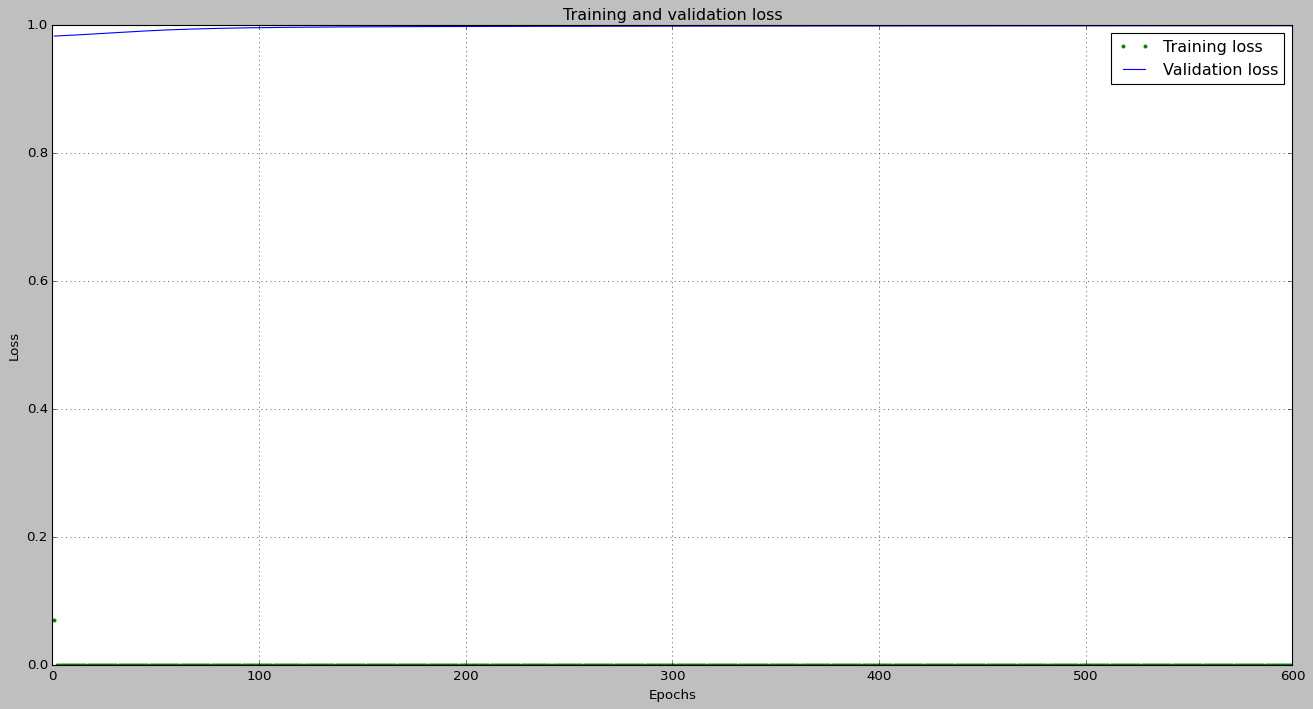

[20.0, 10.0]


In [68]:
# increase the size of the graphs. The default size is (6,4).
plt.rcParams["figure.figsize"] = (20,10)

# graph the loss, the model above is configure to use "mean squared error" as the loss function
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

print(plt.rcParams["figure.figsize"])

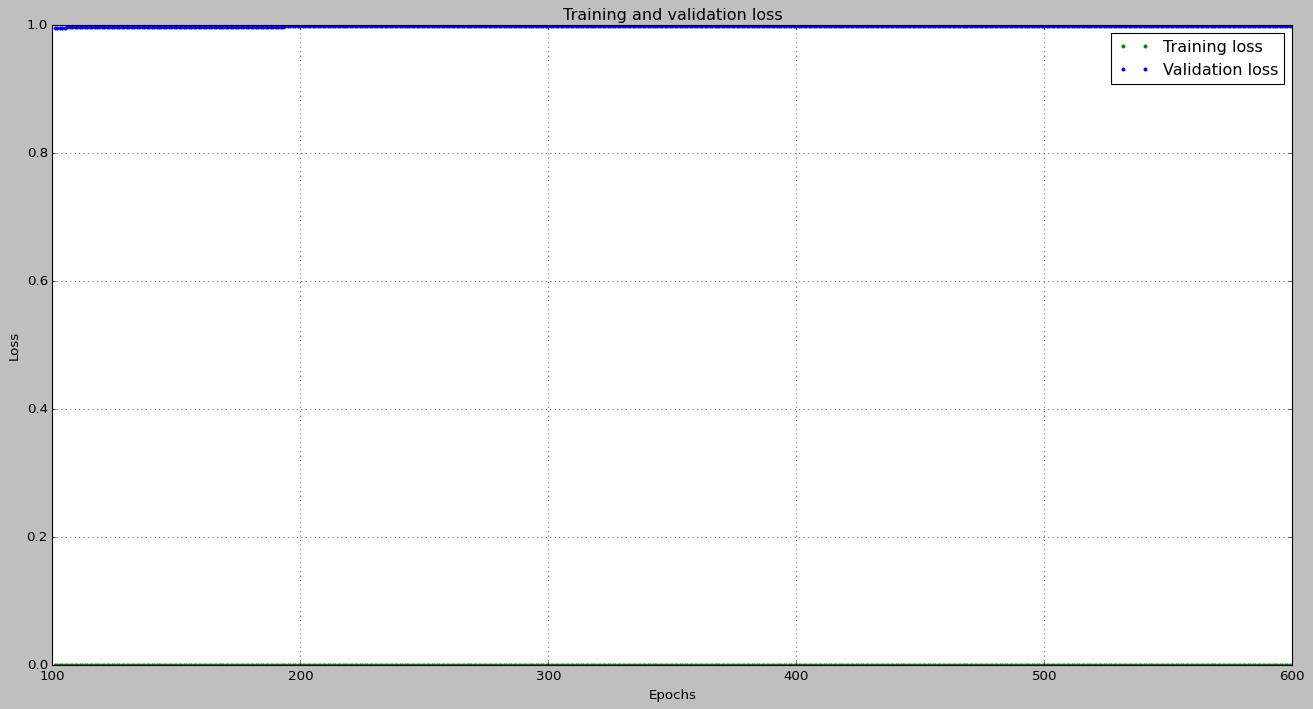

In [65]:
# graph the loss again skipping a bit of the start
SKIP = 100
plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

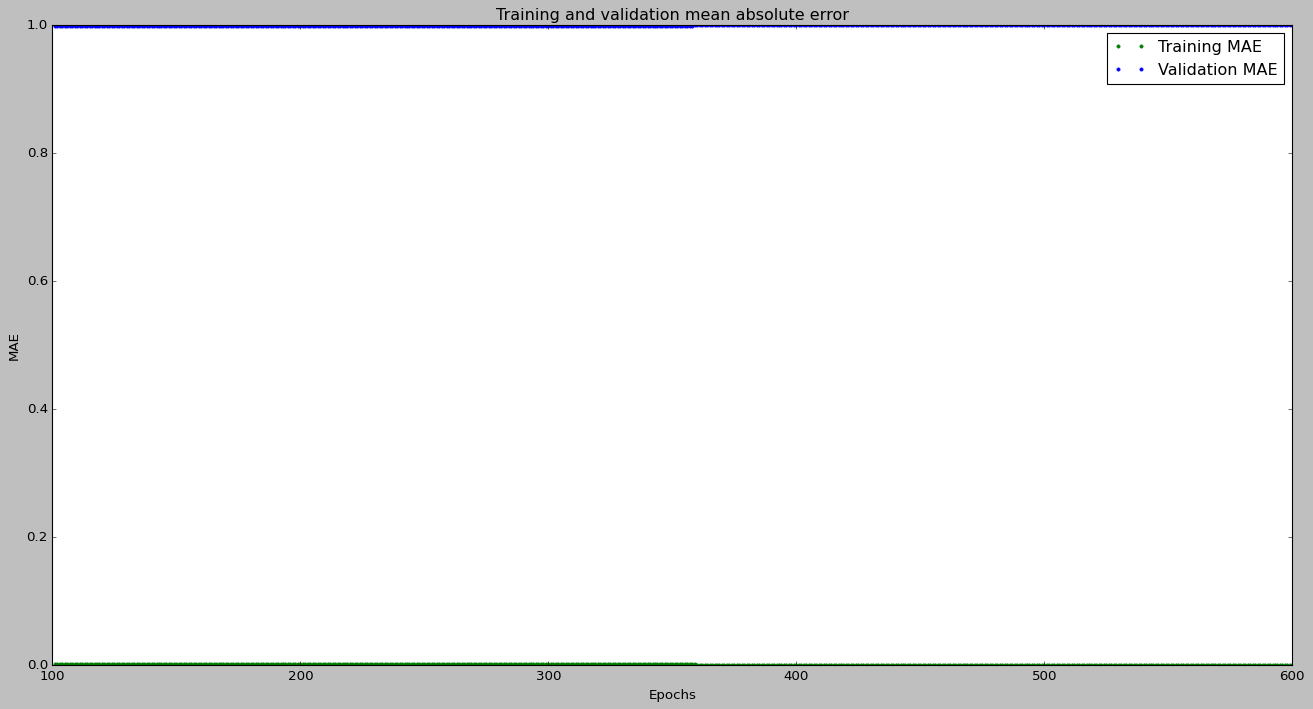

In [66]:
# graph of mean absolute error
mae = history.history['mae']
val_mae = history.history['val_mae']
plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [67]:
# use the model to predict the test inputs
predictions = model.predict(inputs_test)

# print the predictions and the expected ouputs
print("predictions =\n", np.round(predictions, decimals=3))
print("actual =\n", outputs_test)

# Plot the predictions along with to the test data
plt.clf()
plt.title('Training data predicted vs actual values')
plt.plot(inputs_test, outputs_test, 'b.', label='Actual')
plt.plot(inputs_test, predictions, 'r.', label='Predicted')
plt.show()

ValueError: Unexpected result of `predict_function` (Empty batch_outputs). Please use `Model.compile(..., run_eagerly=True)`, or `tf.config.run_functions_eagerly(True)` for more information of where went wrong, or file a issue/bug to `tf.keras`.